## BEER!
### Brent Jensen Capstone 2 project.  Springboard, 2019  
"Whoever drinks BEER, he is quick to sleep; whoever sleeps long, does not sin; whoever does not sin, enters Heaven! Thus, let us drink BEER!" Martin Luther

### Why I search for beer:
This is my second project at Springboard, meant to apply supervised learning techniques to text data.  As a lover of craft beer, I often check reviews on BeerAdvocate.com to inform my choice when buying beer.  So I set out to explore data at BeerAdvocate.com.  

### Initial questions:
1. What beers are most reviewed?  (measure by style)  
2. What do reviews look like?  (what is the longest review, or shortest.  Are they orderly, with paragraphs and bullets?  How is the spelling?  Do they use long or short words?  (histograms)  
3. Do they use descriptive words?  What words are most common?  
4. What breweries are most reviewed?  How many beers does a typical brewery produce?   
5. Ratings: what's the distribution?  Average?  
6. Correlation: between review characteristics and rating.  
7. Correlation: between review and style.  

In [130]:
# IMPORT MODULES AND THE DATA SET
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

df = pd.read_csv('beer.csv', header=0)
df_copy = df  #save a copy of dataframe for reference. 
print('length',len(df))
pd.set_option('max_colwidth', 220)
df.head(3)

length 80818


,name,brewery,style,rating,review
0,Big Rock Ale,Big Rock Brewery,Scottish Ale,3.90,"smell  soft hop aroma with significant malt scents. this one smells very creamy. taste  and creamy it is. the traditional irish flavors come out at the tongue. this is creamy, not like a cream ale, but close. the m..."
1,Flip Ale,Dogfish Head Craft Brewery,Old Ale,4.08,on tap at dfh rehoboth... collab with eatily... cardamom and red wine must. golden orange. .no head. typical dfh yeast aroma. ..some spice and maybe a belgian influence. sweet spicy and somewhat fruity.. not much ol...
2,The Almond Marzen Project - Beer Camp #26,Sierra Nevada Brewing Co.,Märzen / Oktoberfest,3.78,"nice auburn impressions, tons of clarity, solid inch of off white head. aroma was a little bit sweet and nutty. taste gave a little more sweetness, stayed away from hops and bitterness, relatively light bodied. no..."


In [2]:
df.shape

(80818, 5)

### 1. BEER STYLES:  


In [6]:
# What beers are most reviewed? (measure by style)
# BEER STYLES:
styles = df.groupby(['style']).size() 
print('Number of styles used:', len(styles))
print('')
print(styles.sort_values(ascending=False))

Number of styles used: 104

style
American IPA                           9758
American Pale Ale (APA)                4877
American Double / Imperial IPA         4100
Saison / Farmhouse Ale                 4090
American Wild Ale                      2928
American Porter                        2681
American Double / Imperial Stout       2465
American Amber / Red Ale               2365
American Stout                         2114
Fruit / Vegetable Beer                 1740
American Brown Ale                     1647
American Blonde Ale                    1427
Hefeweizen                             1283
Witbier                                1235
Belgian Pale Ale                       1224
American Pale Wheat Ale                1117
German Pilsener                        1082
Russian Imperial Stout                 1060
Berliner Weissbier                     1030
American Black Ale                      986
English Bitter                          958
Milk / Sweet Stout                      92

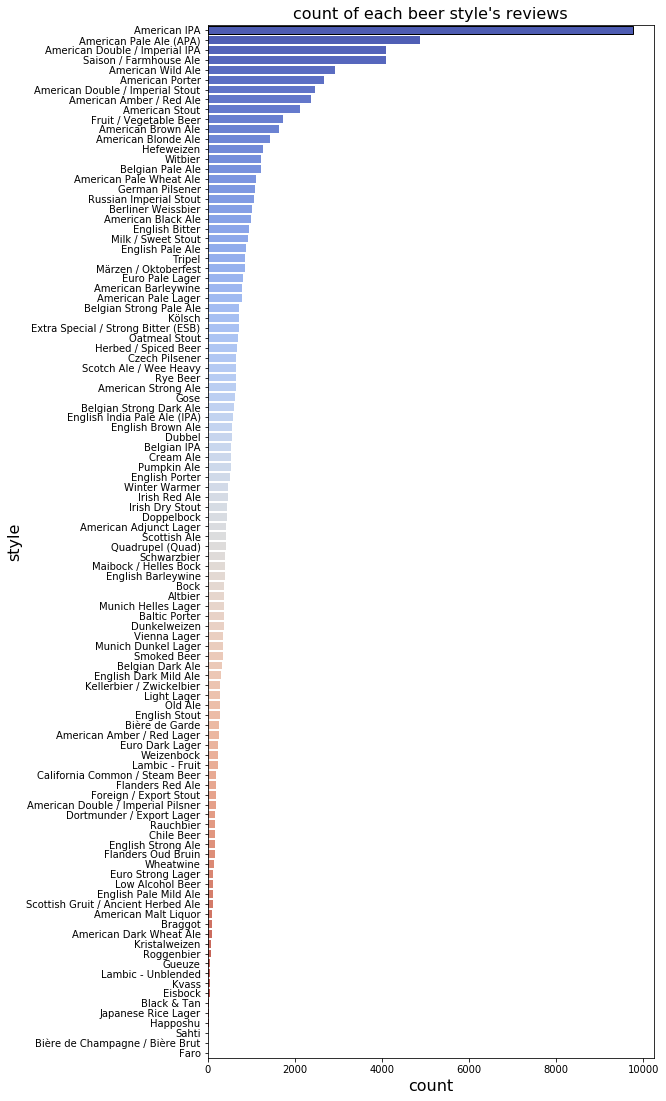

In [8]:
# same info as a colorful bar chart
import matplotlib.pyplot as plt
import seaborn as sns
styles = pd.DataFrame()
labels = df.groupby(['style']).size() 
styles['count'] = labels
styles['style'] = labels.index
styles = styles.sort_values(by='count', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(8,19)
sns.barplot(x='count', y='style', data=styles, ax=ax, palette="coolwarm", edgecolor="k")
plt.title("count of each beer style's reviews", size=16)
plt.ylabel('style', size=16)
plt.xlabel('count', size=16)
plt.show()

Some styles have very few reviews in my sample of 80,818.   
American IPA has 9758 reviews.  
This data set will be imbalanced.  

Follow up question: does American IPA correlate with English IPA or other IPAs?  Should I combine these styles?  Perhaps other styles are also similar (Engl dark mild and Engl brown.)  
Also, do I have too little data to evaluate the least reviewed styles?  


### 2. Review appearance:  
#### What do reviews look like? (what is the longest review, or shortest. Are they orderly, with paragraphs and bullets?  How is the spelling? Do they use long or short words? (histograms)

In [13]:
df.review[1]

' on tap at dfh rehoboth... collab with eatily... cardamom and red wine must. golden orange. .no head. typical dfh yeast aroma. ..some spice and maybe a belgian influence. sweet spicy and somewhat fruity.. not much old ale characteristic. too light for that. its still tasty. the cardamom does add some nice flavor but not its still kind if lacking in complexity. good not great.  '

In [14]:
# the shortest reviews are one blank character:
df.review[7]

' '

verbose reviews: 63,194
  blank reviews: 17,624
  total reviews: 80,818
blank reviews are 21.81% out of 80818 observations

CHART: top bar shows blank reviews, lower bar shows verbose reviews


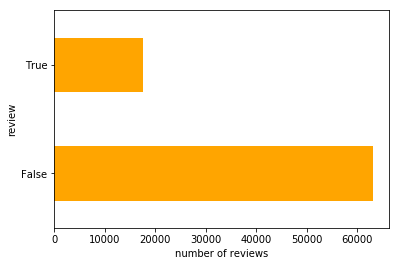

In [15]:
#count the blank reviews and the non-blank (verbose) reviews
b = df.groupby([df['review']==' ']).size()
print('verbose reviews:', format(b[0], ',d'))
print('  blank reviews:', format(b[1], ',d'))
print('  total reviews:', format(len(df), ',d'))
print("blank reviews are {:.2f}% out of {} observations".format(100* b[1]/(b[1]+b[0]), b[1]+b[0]))

print('')
print('CHART: top bar shows blank reviews, lower bar shows verbose reviews')
_= b.plot(kind='barh', color='orange')
_= plt.xlabel('number of reviews')
plt.show()

17624
7625
2468
1428
814
18


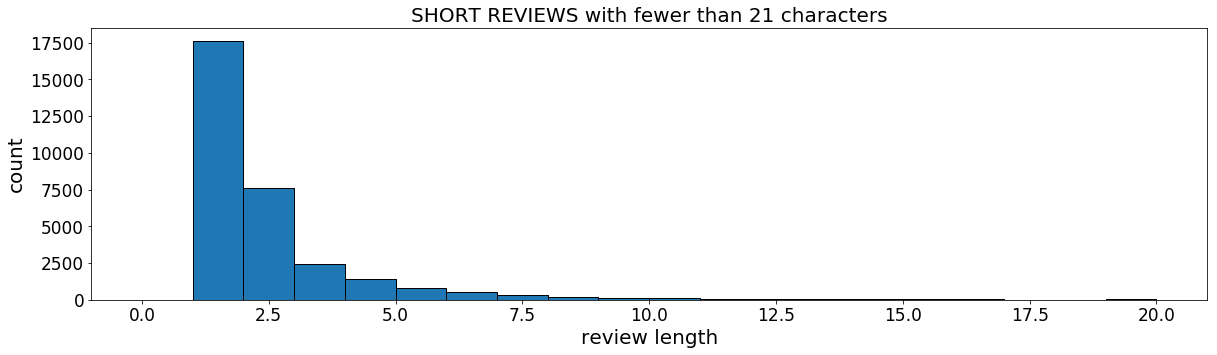

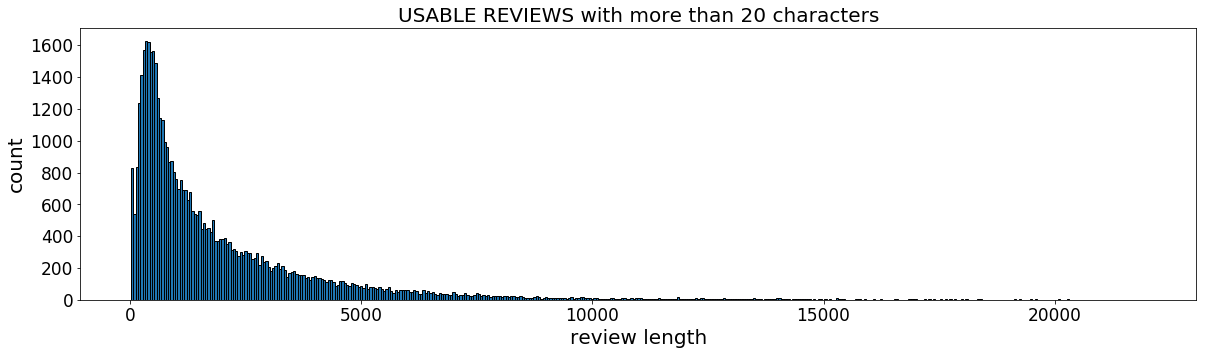

In [16]:
# review length distribution.  
# add a column that measures length of 'review'
df['review_length'] = df['review'].str.len()
print(sum(df['review_length']==1))
print(sum(df['review_length']==2))
print(sum(df['review_length']==3))
print(sum(df['review_length']==4))
print(sum(df['review_length']==5))
print(sum(df['review_length']==20))
max(df.review_length)

bins= np.arange(0,21,1)  
_= plt.figure(figsize=(20,5))
_= plt.hist(df['review_length'], bins=bins, edgecolor="k")
_= plt.xticks(size=17)
_= plt.yticks(size=17)
_= plt.title('SHORT REVIEWS with fewer than 21 characters', size=20)
_= plt.xlabel('review length', size=20)
_= plt.ylabel('count', size=20)
plt.show()

bins= np.arange(21,22000,50)  
_= plt.figure(figsize=(20,5))
_= plt.hist(df['review_length'], bins=bins, edgecolor="k")
_= plt.xticks(size=17)
_= plt.yticks(size=17)
_= plt.title('USABLE REVIEWS with more than 20 characters', size=20)
_= plt.xlabel('review length', size=20)
_= plt.ylabel('count', size=20)
plt.show()


In [17]:
# explore word length per review:
# only measure verbose reviews.  If review is blank, set length to the avg of the verbose reviews.

df['review_length'] = df['review'].apply(len)

# average word length
def avg_word_len(words):
    separate_words = words.split()
    count_words = (len(separate_words))    # number of words
    if count_words> 0:
        characters = len(words)  # length of text
        avg = (characters - count_words+1)/count_words
    else:
        avg = 5.13  # this is the mean of the verbose reviews    
    return avg   

df['avg_word_length'] = df['review'].apply(avg_word_len)

mean word length: 4.9266452222155666
review with shortest words: 2.0
review with longest words: 30.0
reviews avg word < 4.1: 679
reviews avg word > 5.7: 1074


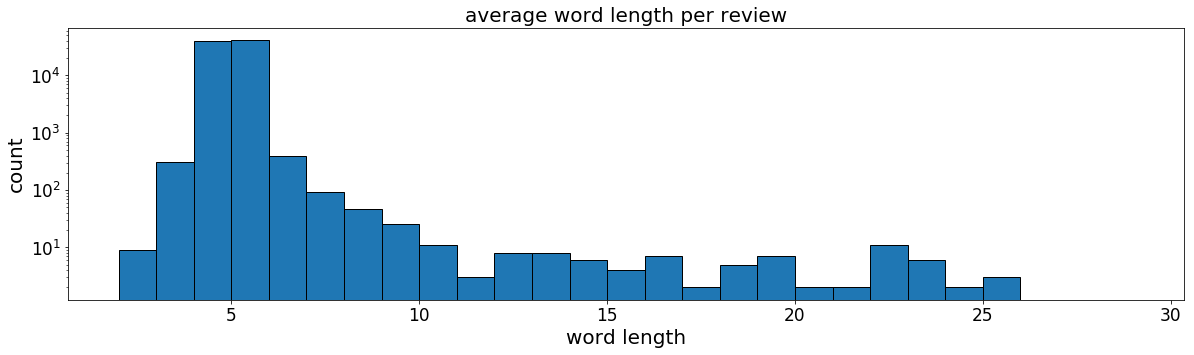

In [18]:
# histogram of average word length

print('mean word length:', np.mean(df['avg_word_length']))
print('review with shortest words:', np.min(df.avg_word_length))
print('review with longest words:', np.max(df.avg_word_length))
print('reviews avg word < 4.1:', sum(df.avg_word_length<4.1))
print('reviews avg word > 5.7:', sum(df.avg_word_length>5.7))

bins= np.arange(2,30,1)  
_= plt.figure(figsize=(20,5))
_= plt.yscale('log', nonposy='clip')
_= plt.hist(df['avg_word_length'], bins=bins, edgecolor="k")
_= plt.xticks(size=17)
_= plt.yticks(size=17)
_= plt.title('average word length per review', size=20)
_= plt.xlabel('word length', size=20)
_= plt.ylabel('count', size=20)
plt.show()

In [24]:
# longest average word length 30 characters!  Look at such reviews.  
long_word_df = df[df['avg_word_length']>15]
print(len(long_word_df))
print(long_word_df['review'])

49
476                          4/4.25/4.25/4/4.25 
2781                         4/3.5/3.5/3.75/3.5 
6128                    3.25/3.25/3.25/3.5/3.25 
13383                     3.75/4/3.75/3.75/3.75 
15964                very flavorful.            
16762                   2.75/3.25/3.5/3.25/3.25 
17723                           3.75/4/3.75/4/4 
23377                    4/3.25/3.25/3.75/3.25  
23569                     3.75/3.5/3.5/3.75/3.5 
24772                              outstanding! 
24993                        10-24              
25884                     3.75/3.5/3.75/3.5/3.5 
26775                                   12-10   
27239                     3.25/3.5/3.5/3.25/3.5 
33874          flashback #144                   
37783                    3.75/2.5/2.25/2.75/2.5 
39965                         3.75/3.25/2.5/3/3 
40034                    3.5/3.25/3.25/3.5/3.25 
41231                        4/4/3.75/3.75/3.75 
41404                        3.75/4.25/4.25/4/4 
41742            

reviews with very long avg word length are not interesting. Mostly strings of digits. In analysis, I'll strip numbers, so these will be gone.

In [23]:
# look at the shortest reviews, with > 1 char and < 15 chars

short_reviews = df[df['review'].str.len()<15]
print(len(short_reviews))
print(type(short_reviews))
full = ''
for r in short_reviews['review']:
    full = full + r
print(full[:30000])  #just look at the first 30,000 reviews, and print the short reviews.

31527
<class 'pandas.core.frame.DataFrame'>
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   eric                                                                                     

### 3. WORDS
#### what words are common?  Convert reviews to "bag of words"  Remove capitals and non-letters

In [25]:
# Change review to a string of words.  remove non-letters, make lower case, split into words.  
# Remove stopwords (common words.)  Join back together into a long string of words. 
def review_to_words(review):
    letters_only = re.sub('[^a-zA-Z]',' ', review)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))  
    good_words = [w for w in words if not w in stops]
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in good_words]
    return(' '.join(good_words))

# clean the reviews
df['clean_review'] = df['review'].apply(review_to_words)  

In [28]:
# check word length again, see if it changed (it was 4.93)
df['review_length'] = df['clean_review'].apply(len)

# average word length
def avg_word_len(words):
    separate_words = words.split()
    count_words = (len(separate_words))    # number of words
    if count_words> 0:
        characters = len(words)  # length of text
        avg = (characters - count_words+1)/count_words
    else:
        avg = 5.65  # this is the mean of 49000 reviews    
    return avg   

print('number of characters per review')
print('mean:',df['review_length'].mean())
print('max: ',df['review_length'].max())
print('min: ',df['review_length'].min())
print('')
print('word length per review')
df['avg_word_length'] = df['clean_review'].apply(avg_word_len)
print('mean:',df['avg_word_length'].mean())
print('max: ',df['avg_word_length'].max())
print('min: ',df['avg_word_length'].min())

number of characters per review
mean: 803.5154915984062
max:  14369
min:  0

word length per review
mean: 5.669480359625356
max:  13.0
min:  1.0


by removing very short reviews, and by removing numbers and characters, the avg word length went up to 5.67

In [119]:
from collections import Counter
many = 40
word_count = Counter(" ".join(df['clean_review']).split()).most_common(many)
word_chart = word_chart.sort_values(by='count', ascending=False)
print(word_count)

[('beer', 145524), ('head', 119439), ('light', 103267), ('taste', 94320), ('malt', 82319), ('nice', 80718), ('good', 78322), ('like', 75384), ('sweet', 71317), ('carbonation', 68903), ('hops', 67137), ('medium', 63726), ('aroma', 62816), ('bit', 61047), ('body', 58450), ('one', 57407), ('white', 57115), ('dark', 57107), ('finish', 56241), ('flavor', 55894), ('little', 53048), ('well', 53003), ('notes', 48459), ('color', 47202), ('pours', 44737), ('glass', 44474), ('hop', 44160), ('caramel', 42297), ('brown', 41374), ('lacing', 41290), ('smell', 40979), ('overall', 40883), ('mouthfeel', 40410), ('bitterness', 39605), ('nose', 39407), ('really', 39345), ('citrus', 38264), ('bottle', 38264), ('much', 35621), ('chocolate', 35436)]


In [120]:
labels, values = zip(*word_count)

In [121]:
print(labels, values)

('beer', 'head', 'light', 'taste', 'malt', 'nice', 'good', 'like', 'sweet', 'carbonation', 'hops', 'medium', 'aroma', 'bit', 'body', 'one', 'white', 'dark', 'finish', 'flavor', 'little', 'well', 'notes', 'color', 'pours', 'glass', 'hop', 'caramel', 'brown', 'lacing', 'smell', 'overall', 'mouthfeel', 'bitterness', 'nose', 'really', 'citrus', 'bottle', 'much', 'chocolate') (145524, 119439, 103267, 94320, 82319, 80718, 78322, 75384, 71317, 68903, 67137, 63726, 62816, 61047, 58450, 57407, 57115, 57107, 56241, 55894, 53048, 53003, 48459, 47202, 44737, 44474, 44160, 42297, 41374, 41290, 40979, 40883, 40410, 39605, 39407, 39345, 38264, 38264, 35621, 35436)


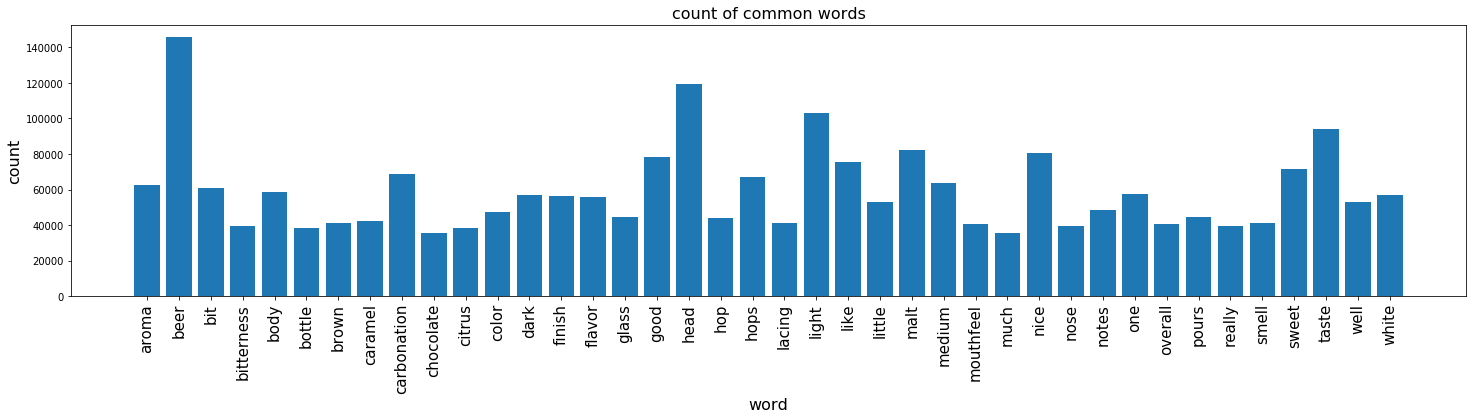

In [122]:
_= plt.figure(figsize = (25,5))
_= plt.bar (labels, values)
_= plt.title("count of common words", size=16)
_= plt.xlabel('word', size = 16)
_= plt.xticks(rotation = 'vertical', size=15)
_= plt.ylabel('count', size = 16)
plt.show()

In [123]:
# print top 200 words
from collections import Counter
many = 200
word_count = Counter(" ".join(df['clean_review']).split()).most_common(many)
word_chart = word_chart.sort_values(by='count', ascending=False)
print(word_count)

[('beer', 145524), ('head', 119439), ('light', 103267), ('taste', 94320), ('malt', 82319), ('nice', 80718), ('good', 78322), ('like', 75384), ('sweet', 71317), ('carbonation', 68903), ('hops', 67137), ('medium', 63726), ('aroma', 62816), ('bit', 61047), ('body', 58450), ('one', 57407), ('white', 57115), ('dark', 57107), ('finish', 56241), ('flavor', 55894), ('little', 53048), ('well', 53003), ('notes', 48459), ('color', 47202), ('pours', 44737), ('glass', 44474), ('hop', 44160), ('caramel', 42297), ('brown', 41374), ('lacing', 41290), ('smell', 40979), ('overall', 40883), ('mouthfeel', 40410), ('bitterness', 39605), ('nose', 39407), ('really', 39345), ('citrus', 38264), ('bottle', 38264), ('much', 35621), ('chocolate', 35436), ('orange', 35317), ('dry', 34506), ('bitter', 33563), ('malts', 32790), ('fruit', 32171), ('smooth', 31932), ('slightly', 31649), ('style', 31342), ('sweetness', 31251), ('flavors', 30856), ('ale', 30127), ('poured', 29538), ('quite', 28979), ('pretty', 28944), (

## 4. BREWERIES
count number of reviews from each brewery
I don't know if brewery will be significant.
Rock Bottom and Tired Hands had over 300 reviews each! (and I've never heard of them.)
The majority had 1 review.

In [124]:
df['brewery'].describe()

count                                80818
unique                               10817
top       Rock Bottom Restaurant & Brewery
freq                                   391
Name: brewery, dtype: object

In [126]:
# examine distribution of breweries

breweries = df.brewery.value_counts()
print('number of breweries reviewed:',len(breweries))
print('breweries with only 1 review:',sum(breweries==1))
print('breweries with 2 or 3 reviews:', sum(breweries==2)+sum(breweries==3))
print('')
print(breweries[breweries>90])

number of breweries reviewed: 10817
breweries with only 1 review: 2612
breweries with 2 or 3 reviews: 2919

Rock Bottom Restaurant & Brewery                   391
Tired Hands Brewing Company                        320
Cigar City Brewing                                 289
Goose Island Beer Co.                              235
Iron Hill Brewery & Restaurant                     228
Mikkeller ApS                                      221
The Bruery                                         185
Pizza Port Solana Beach                            183
Stone Brewing                                      180
Imperial Oak Brewing                               172
Sierra Nevada Brewing Co.                          165
Minneapolis Town Hall Brewery                      155
Wicked Weed Brewing                                139
Captain Lawrence Brewing Co.                       138
Al's of Hampden / Pizza Boy Brewing                137
Founders Brewing Company                           135
Short's Brew

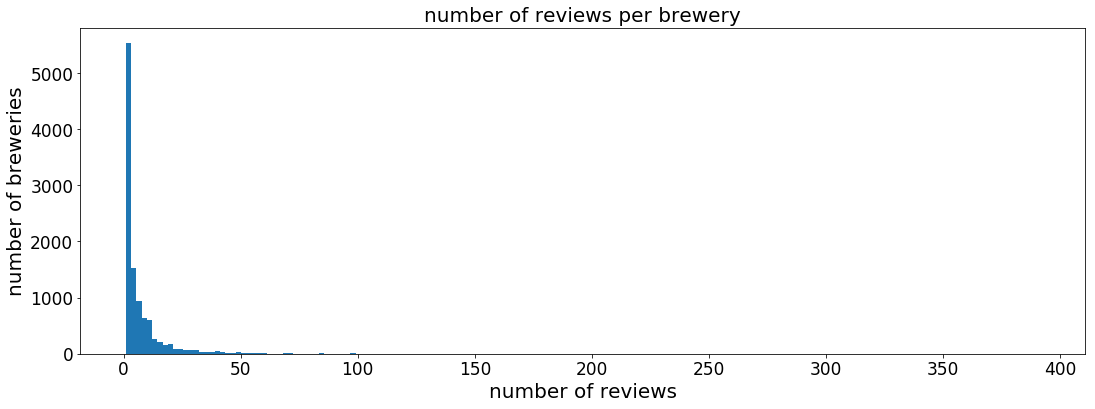

In [127]:
#_= breweries.hist(bins=175)
_= plt.figure(figsize=(18,6))
_= plt.hist(breweries, bins=175)
_= plt.xticks(size=17)
_= plt.yticks(size=17)
_= plt.title('number of reviews per brewery', size=20)
_= plt.xlabel('number of reviews', size=20)
_= plt.ylabel('number of breweries', size=20)
plt.show()

## 5. RATINGS 
show distribution  
Beers are rated on a scale of 1 to 5. Ratings are averaged, so a rating can be anywhere in between.
Check that no ratings exist >5 or <1.
Plot a chart to see its shape.

In [131]:
meanrating= df.rating.mean()
print('mean rating: {:.2f}'.format(meanrating))
SDrating= df.rating.std()
print('standard deviation: {:.4f}'.format(SDrating))
print('median rating:', df.rating.median())
print('lowest rating:', df.rating.min())
print('highest rating:', df.rating.max())

mean rating: 3.73
standard deviation: 0.4588
median rating: 3.79
lowest rating: 1.0
highest rating: 5.0


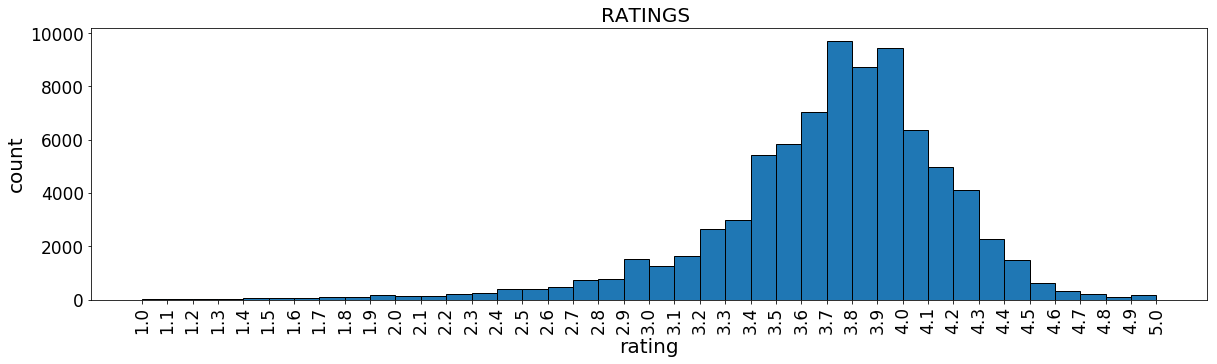

mean rating: 3.73
standard deviation: 0.4588
median rating: 3.79


In [134]:
# ratings distribution.  
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

bins= np.arange(1,5.1,0.1)   # bins from 1 to 5, increments of 0.1
_= plt.figure(figsize=(20,5))
_= plt.hist(df['rating'], bins=bins, edgecolor="k") 
_= plt.xticks(bins, rotation='vertical',size=17)
_= plt.yticks(size=17)
_= plt.title('RATINGS ', size=20)
_= plt.xlabel('rating', size=20)
_= plt.ylabel('count', size=20)
plt.show()

meanrating= df.rating.mean()
print('mean rating: {:.2f}'.format(meanrating))
SDrating= df.rating.std()
print('standard deviation: {:.4f}'.format(SDrating))
print('median rating:', df.rating.median())